# STA 141B: Homework 6
Winter 2018

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [99]:
import lxml.html as lx
import pandas as pd
import requests
import requests_cache
requests_cache.install_cache("cache")
from lxml import html

In [100]:
def extraction(url, numpage):
    
    '''
    
    The function extracts all the links of articles 
    
    Arg: url and number of pages 
    
    Return: number of pages
    
    '''
    
    url_page = url + 'page/' + str(numpage)
    response = requests.get(url_page)
    response.raise_for_status()
    doc = response.text
    html = lx.fromstring(doc, base_url = url_page)
    html.make_links_absolute()
    links = html.xpath("//h2/a/@href")
    return links 


numpage = 2 
url = "https://theaggie.org/arts/"
extraction(url, numpage)

['https://theaggie.org/2018/02/21/department-theater-dance-relocates-pippin-injuries/',
 'https://theaggie.org/2018/02/19/varsity-theater-davis-classic/',
 'https://theaggie.org/2018/02/18/hb-obsessed/',
 'https://theaggie.org/2018/02/18/coco-offers-accurate-exploration-culture/',
 'https://theaggie.org/2018/02/15/preview-pippin-musical/',
 'https://theaggie.org/2018/02/13/listen-up/',
 'https://theaggie.org/2018/02/13/a-valentines-playlist/',
 'https://theaggie.org/2018/02/12/valentines-day-meal/',
 'https://theaggie.org/2018/02/12/entertainment-council-past-present-future/',
 'https://theaggie.org/2018/02/12/abby-stein-transitions/',
 'https://theaggie.org/2018/02/11/web-series-kat-loves-la-features-four-uc-alumni/',
 'https://theaggie.org/2018/02/11/arts-sake-2/',
 'https://theaggie.org/2018/02/09/review-the-post/',
 'https://theaggie.org/2018/02/09/biggest-snubs-throughout-oscar-history/',
 'https://theaggie.org/2018/02/06/first-timers-guide-philz-coffee/']

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [101]:
def extract_article(url):
    
    '''
    extract article from the website
    
    Arg: url 
    
    Return: a dictionary with information needed 
    
    '''
    
    #1. download
    response = requests.get(url)
    response.raise_for_status()
    doc = response.text
    
    #2. parse 
    html = lx.fromstring(doc, base_url = url)
    html.make_links_absolute()
    
    #3. extract text 
    text_link = html.xpath("/html//p")
    text = [x.text_content() for x in text_link]
    news = text[0:-1]
    news = " ".join(news)
    
    
    #4. extract author name 
    
    author = html.xpath("//a[@class = 'author-name author']")[0].text_content()
    if (author == []):
        author = "Police Log"
    else:
        author = html.xpath("//a[@class = 'author-name author']")[0].text_content()
    
    
    #5. extract the title of the article 
    
    sublink = html.xpath("//h1[@class = 'entry-title']")
    title = {"title":x.text_content() for x in sublink}
    
    #6. make the url to dictionary
    dic = dict()
    dic = {"url": url}
    dic
    
    #7. merge all the dictionaries together 
    z = {"url" : url, "text":news, **title, "author":author}
    
    return z


In [102]:
extract_article("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': 'Bianca Antunez  — city@theaggie.org',
 'text': 'Davis residents create financial model to make city’s financial state more transparent To increase transparency between the city’s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design.  Jeff Miller and Matt Williams, who are members of Davis’ Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager.  “City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city’s potential financial position over the long term,” Stachowicz said in an email interview. “We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with 

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [103]:
#Extract url from campus news
url_campus = "https://theaggie.org/campus/"
page_num =[1,2,3,4]
campus_url = [extraction(url, page) for page in page_num]

campus = [[extract_article(link) for link in campus_url[n]] for n in (range(len((campus_url))))]

In [104]:
#Convert the list to a data frame
#Add campus news to the end
campus = [pd.DataFrame(element) for element in campus]
df_campus = pd.concat(campus)
df_campus["category"] = "campus news"
df_campus.shape

(60, 5)

In [105]:
#Extract url from city news
url_city = "https://theaggie.org/city/"
page_num =[1,2,3,4]
city_url = [extraction(url_city, page) for page in page_num]

city = [[extract_article(link) for link in city_url[n]] for n in (range(len((city_url))))]

In [106]:
#Convert the list to a data frame
#Add city news to the end
city = [pd.DataFrame(element) for element in city]
df_city = pd.concat(city)
df_city["category"] = "city news"
df_city.shape

(60, 5)

In [107]:
#Combine two dataframes
df = pd.concat([df_campus, df_city], ignore_index = True)

#Check the number of columns 
df.shape



(120, 5)

__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [108]:
# Set up NLTK packages used by TextBlob.
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/yuxzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yuxzhang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/yuxzhang/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuxzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuxzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import word_tokenize

In [126]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import itertools

In [111]:
#From Nick's discussion codes
text = [str(x) for x in df_campus.text]
text = " ".join(str(x) for x in text)
blob = TextBlob(text)
#remove stopwords
stopwords = stopwords.words("english")
new_text = " ".join(w for w in blob.words if w.lower() not in stopwords)
blob = TextBlob(new_text)

#lemmatize
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)
tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))

In [112]:
#Remove puncuation
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokens_campus = tokenizer.tokenize(new_text)


In [113]:
top_N = 100
word_dist = nltk.FreqDist(tokens_campus)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])

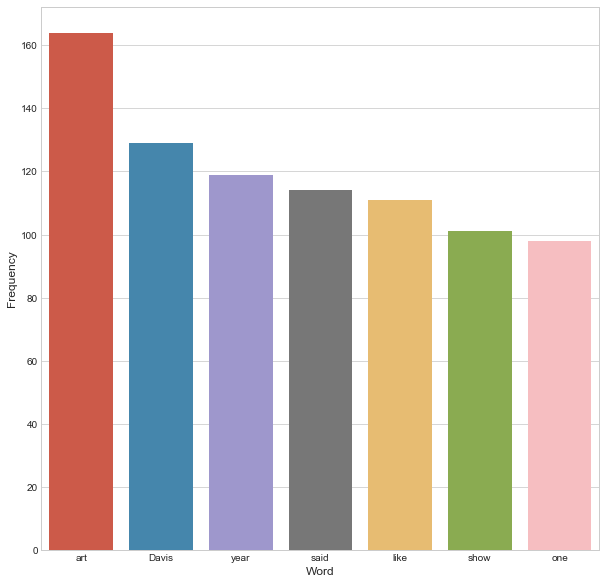

In [114]:
#plot the frequency distribution 
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [115]:
def wc(data, bgcolor):
    '''
    
    Word Cloud function
    
    '''
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color='white', collocations = False)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
    

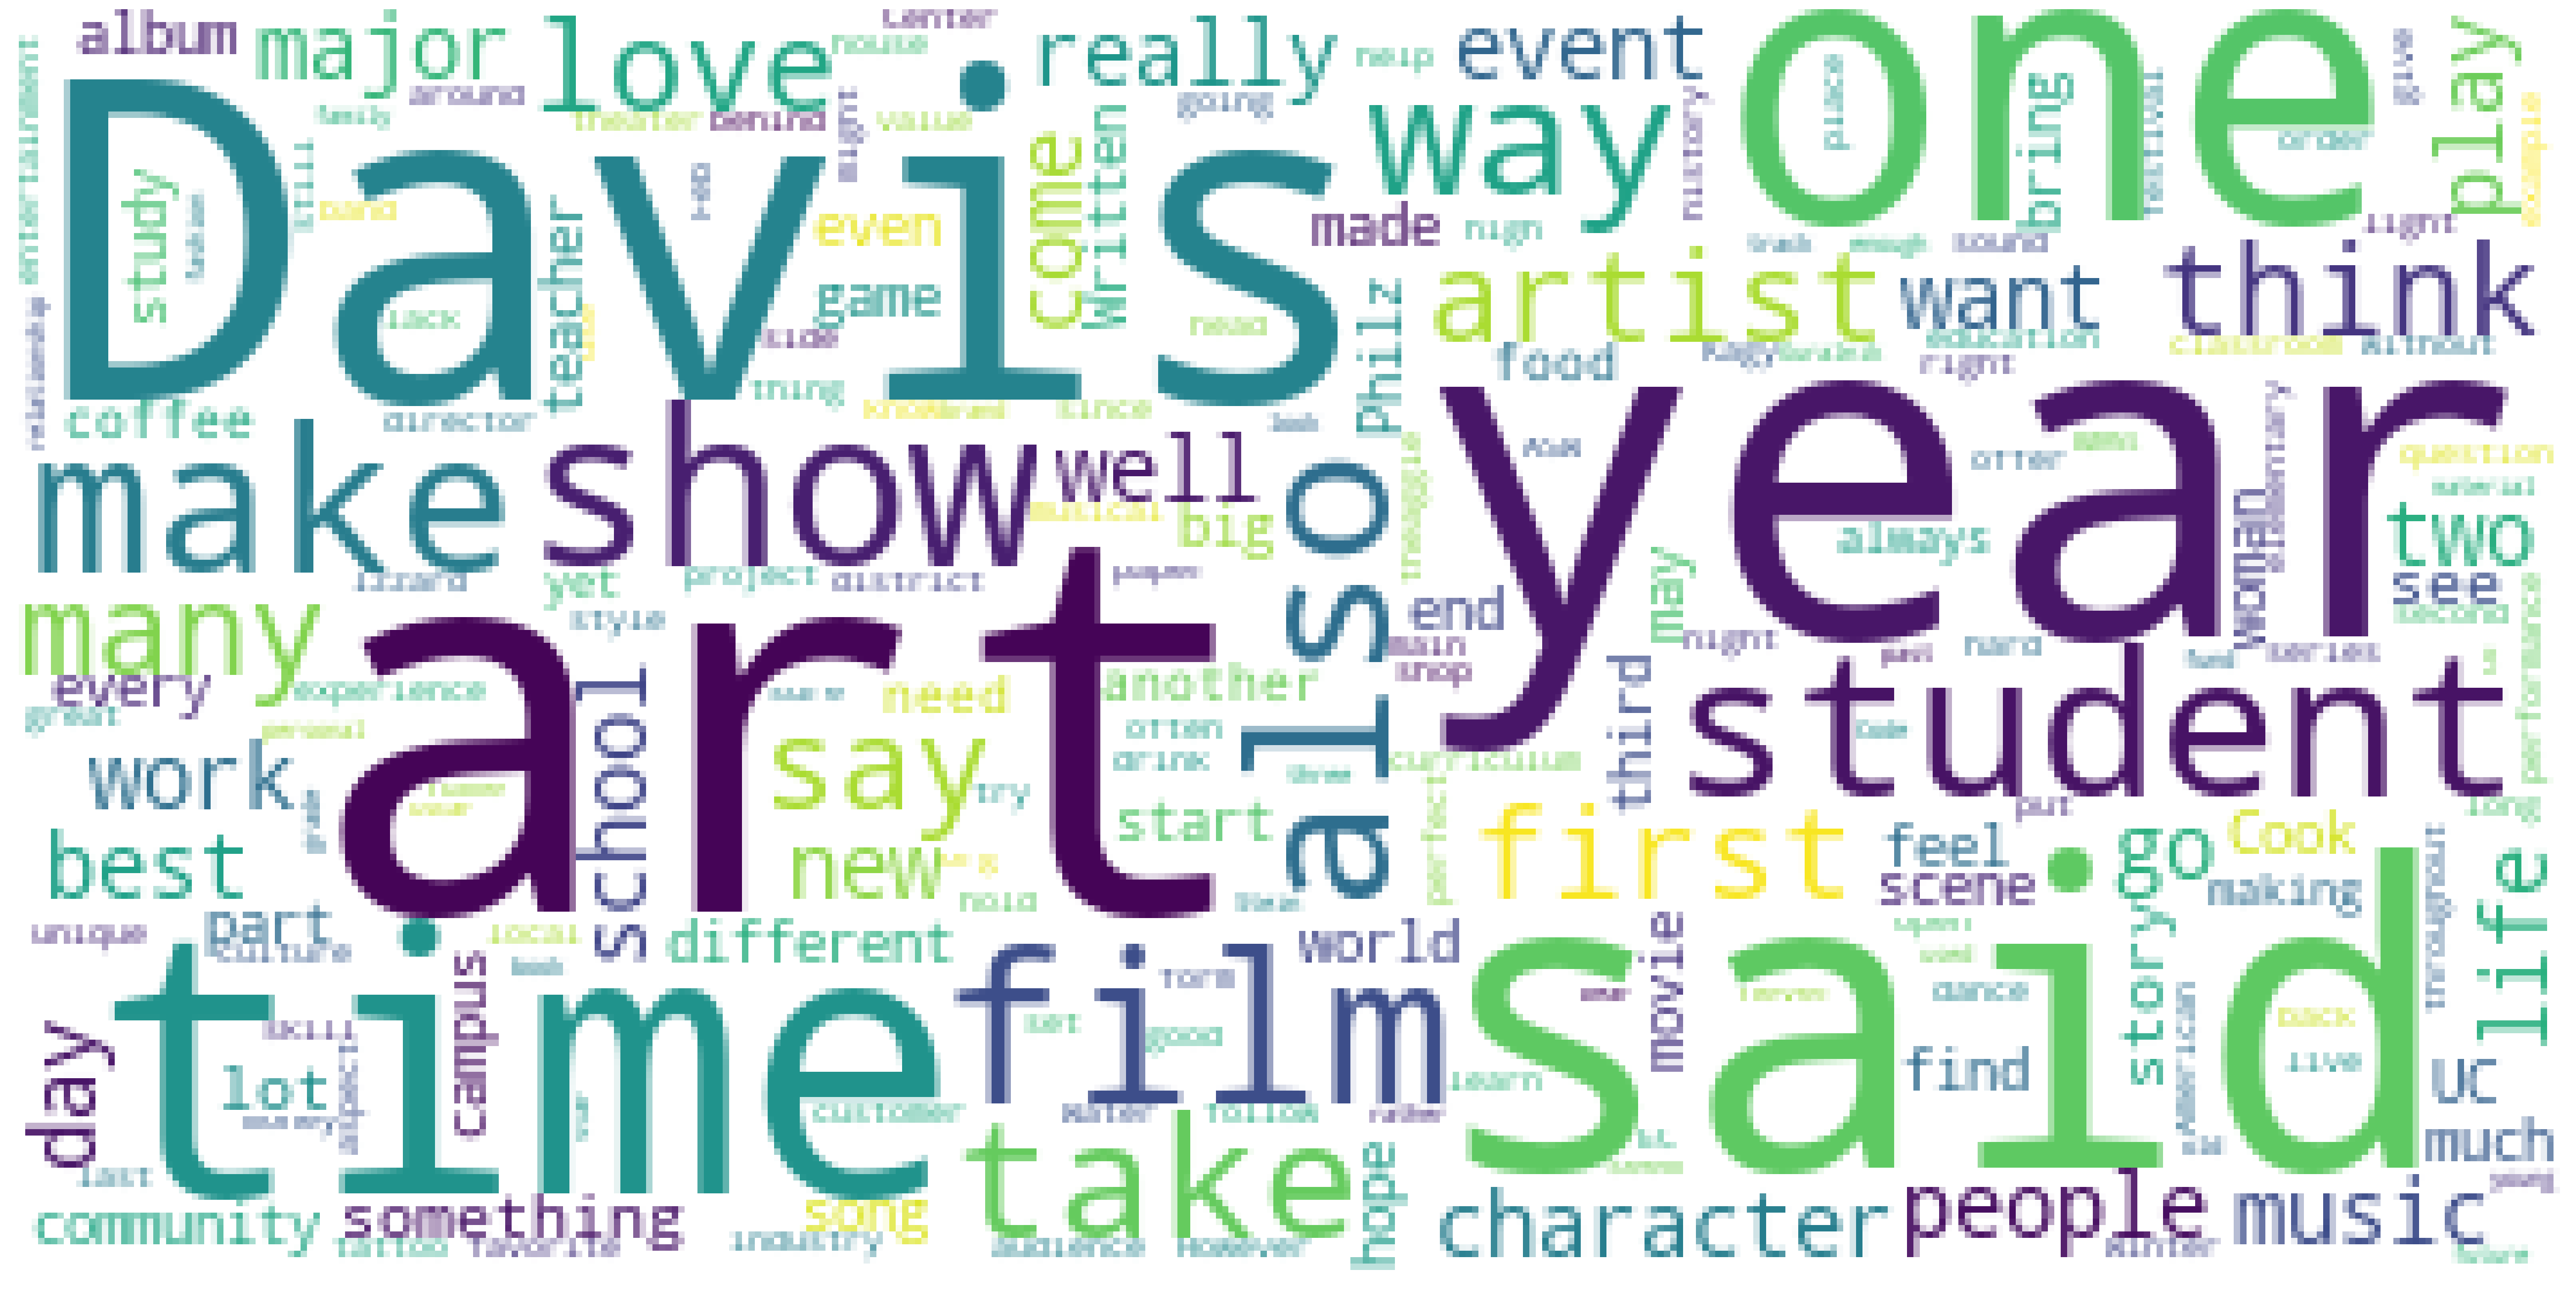

In [116]:
wc(tokens_campus, "white")

In [117]:
#City dataset
text1 = [str(x) for x in df_city.text]
text1 = " ".join(str(x) for x in text1)
blob1 = TextBlob(text1)
#remove stopwords
new_text1 = " ".join(w for w in blob1.words if w.lower() not in stopwords)
blob1 = TextBlob(new_text1)

#lemmatize
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)
tags = [wordnet_pos(x[1]) for x in blob1.pos_tags]
new_text1 = " ".join(x.lemmatize(t) for x, t in zip(blob1.words, tags))

In [118]:
tokenizer1 = RegexpTokenizer(r'\w+')
tokens_city = tokenizer1.tokenize(new_text1)


In [119]:
word_dist1 = nltk.FreqDist(tokens_city)
rslt1 = pd.DataFrame(word_dist1.most_common(top_N),columns=['Word', 'Frequency'])

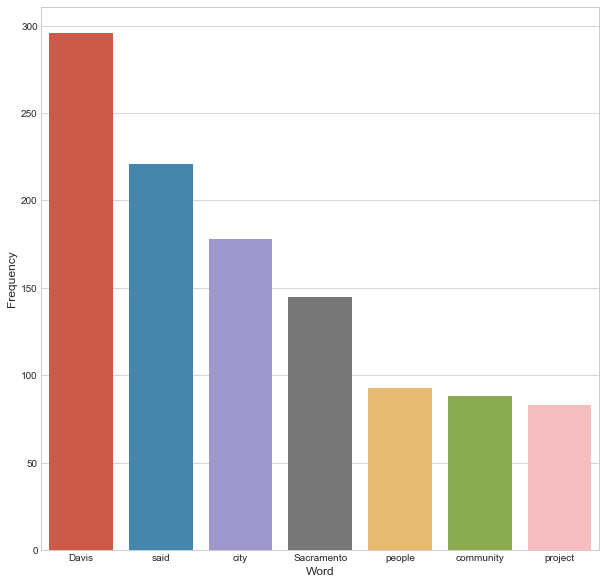

In [120]:
#plot the frequency distribution 
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt1.head(7))

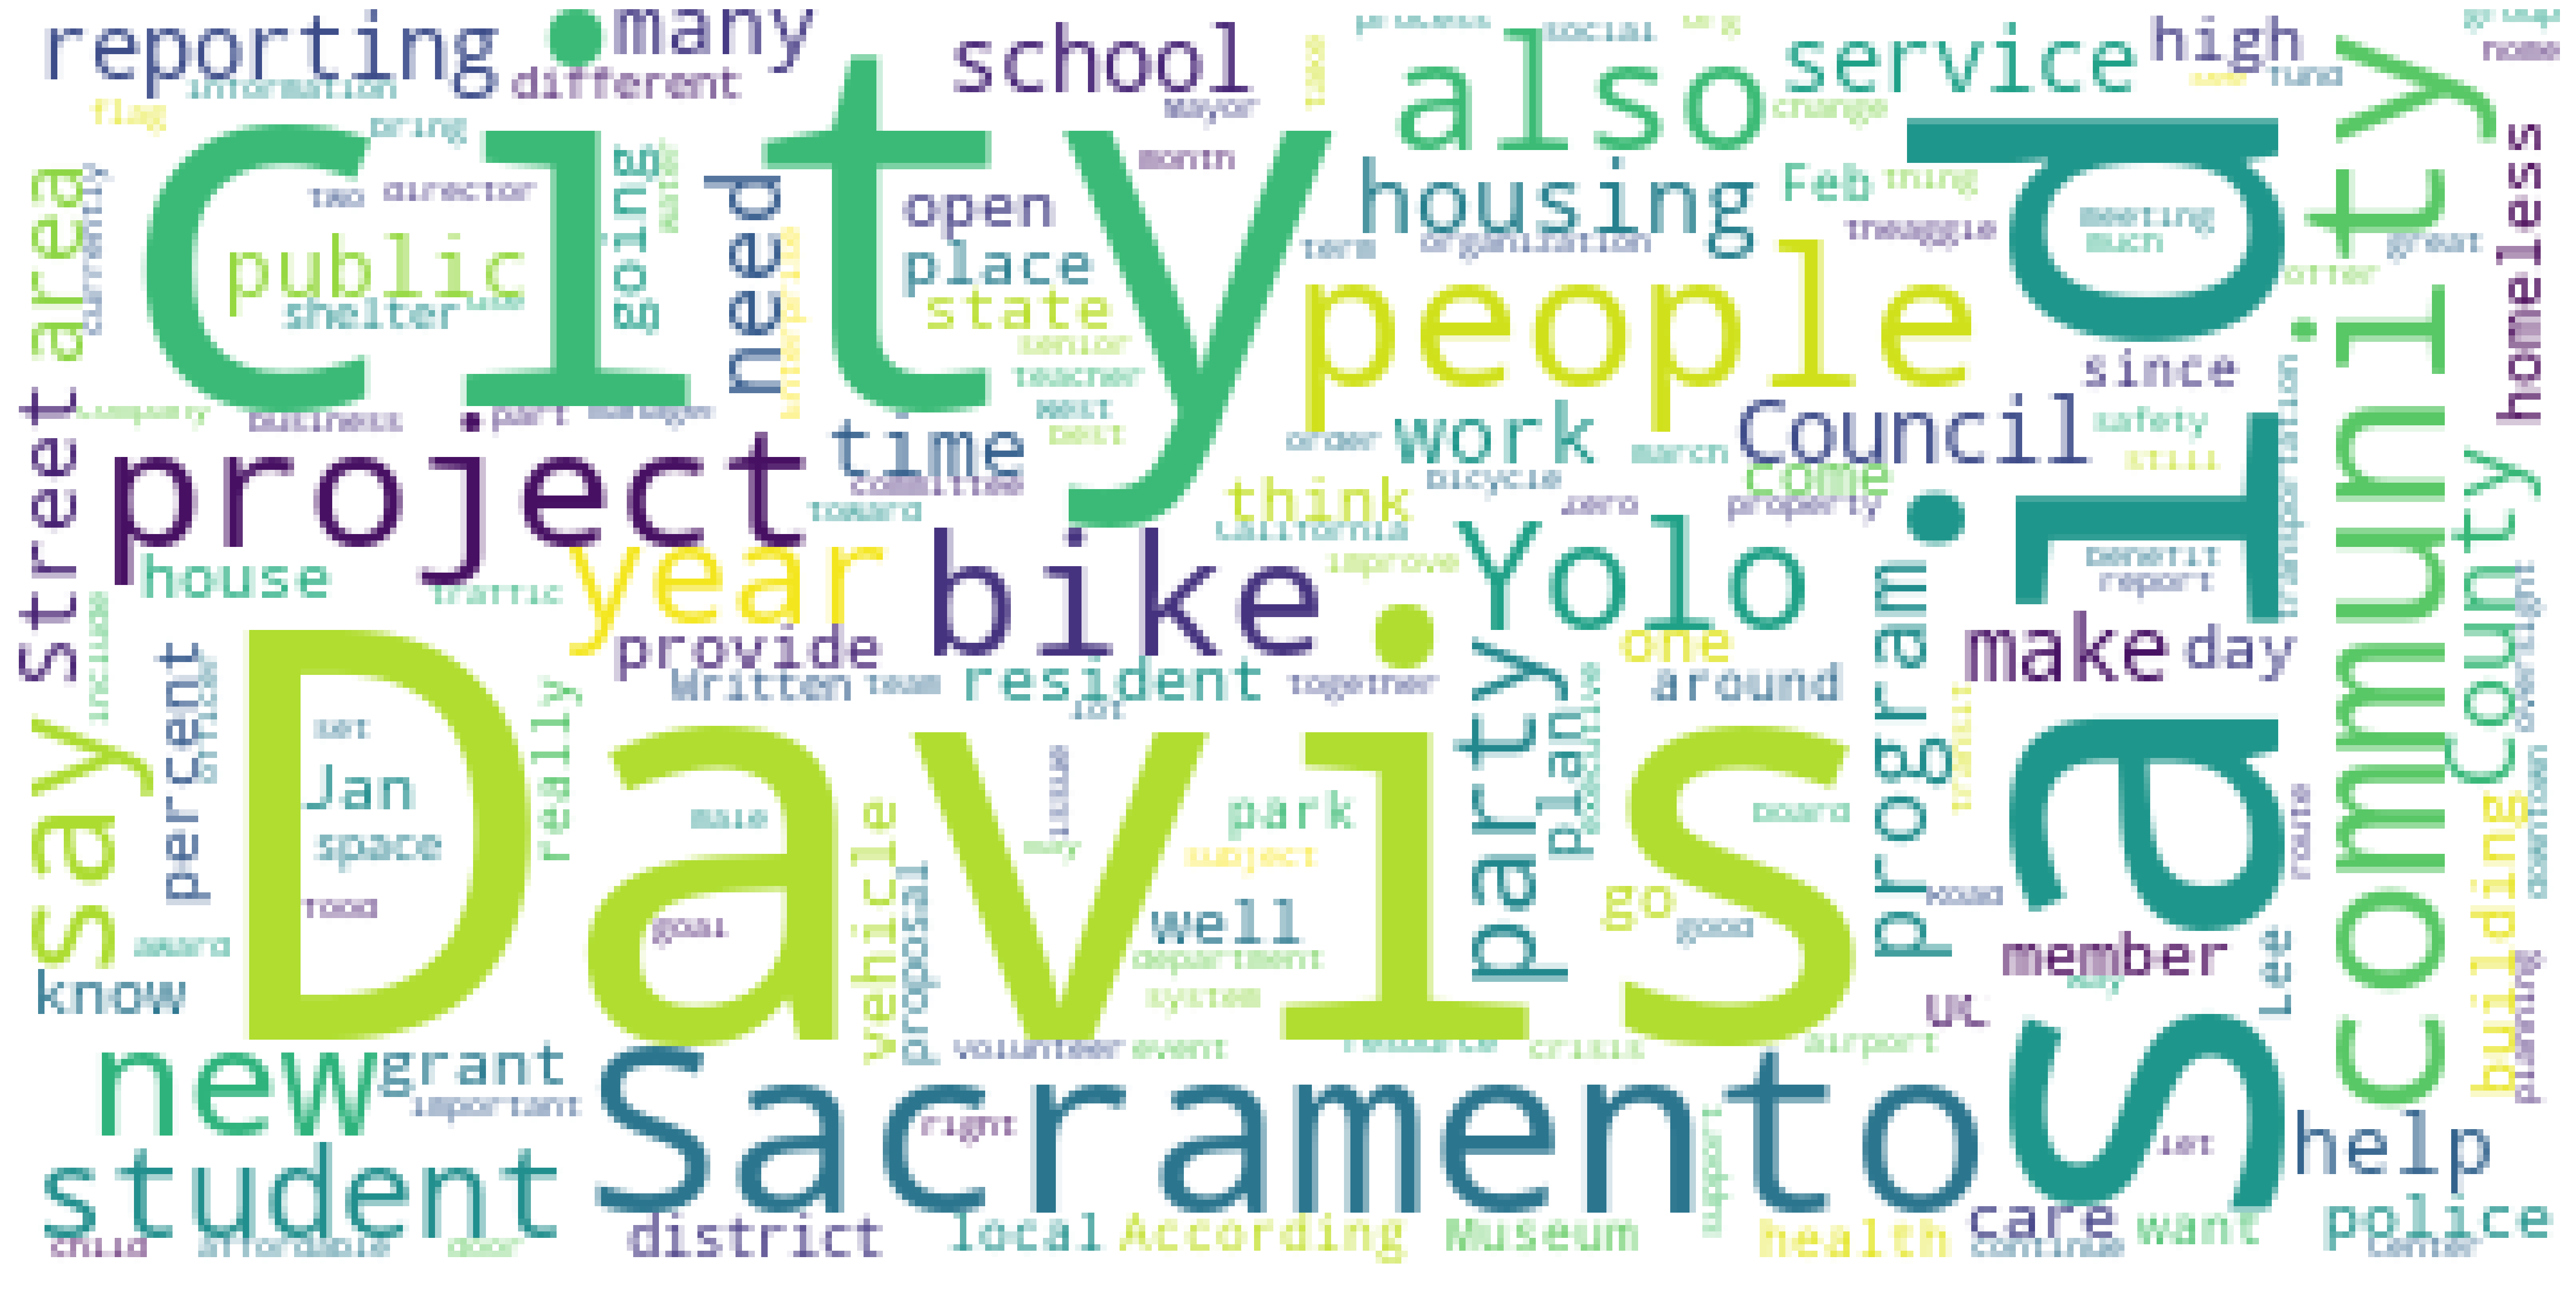

In [121]:
wc(tokens_city, "white")

As the word clouds and histograms show, the topics that the campus news cover the most often is "art" following by "year" and "davis"; The topics that the city news cover the most often is "davis" followed by "city" and "said". 

### What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [122]:
text = df.text
type(text)

pandas.core.series.Series

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer().fit_transform(df.text)
similarity_matrix = (tf_idf * tf_idf.T).A
similarity_matrix

array([[ 1.        ,  0.23698889,  0.25912621, ...,  0.23183917,
         0.2435516 ,  0.09546368],
       [ 0.23698889,  1.        ,  0.26401167, ...,  0.28728398,
         0.26932422,  0.11317392],
       [ 0.25912621,  0.26401167,  1.        , ...,  0.24841859,
         0.26667894,  0.1199625 ],
       ..., 
       [ 0.23183917,  0.28728398,  0.24841859, ...,  1.        ,
         0.33789413,  0.09942781],
       [ 0.2435516 ,  0.26932422,  0.26667894, ...,  0.33789413,
         1.        ,  0.11183801],
       [ 0.09546368,  0.11317392,  0.1199625 , ...,  0.09942781,
         0.11183801,  1.        ]])

In [147]:
#Got idea from jieyi Chen
array_list = similarity_matrix.tolist()
a_list = list(itertools.chain.from_iterable(array_list))
top = sorted(a_list, reverse = True)[:3]

In [149]:
for num in top:
    var = np.nonzero(similarity_matrix == num)
    print (df["title"][var[1][0]])

Two new high-rise office buildings coming to Sacramento
Through the Artist’s Eye: Shuyi Qi
The Winter Blues: A Week 10 Playlist


I think these two are not very good representatives of aggie news. First, our selection is not completely unbias because we only chose the first 60 articles that appear the most recently; Second, there are also a lot of other columns in the websites. This can partially support student groups and Davis city groups, but not completely. 